In [36]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
import timeit

def complexidade_temporal(metodo): 
    def decorator_temporal(args, **kwargs): # arr
        tempoInicial = time.perf_counter()
        chamadaDeMetodo = metodo(args, **kwargs)
        tempoFinal = time.perf_counter()

        return chamadaDeMetodo, tempoFinal - tempoInicial
    return decorator_temporal

##### **MÉTODOS DE ORDENAÇÃO**=> algoritmos que visam organizar dados seguindo um critério específico na menor quantidade de tempo possível
**PARAMÊTROS:**
*   **Número de trocar e inversões** => quantas vezes os elementos trocam de posição?
*   **Número de comparações** => quantas vezes se verifica se um elemento é menor ou maior que outro?
*   **Recursão** => usa ou não?
*   **Estabilidade** => caso um elemento possua o mesmo valor que outro, o algoritmo devolve eles na ordem que eles são encontrados na sequência inicial?
*   **Espaço extra** => além da entrada, quanto espaço esse algoritmo requer?









##### **BUBBLE SORT** => *bolhas maiores sobem mais rápido*
*   Ordena elementos em ordem **crescente**
*   Compara elementos adjacentes (lado a lado)
*   Se o **primeiro** elemento for **maior que** o **segundo**, o primeiro **assume a posição** do segundo e vice-versa
*   O **maior elemento** é sempre usado para **comparar**

(None, 11.75194844699945)


Text(0.5, 1.0, 'Bubble Sort')

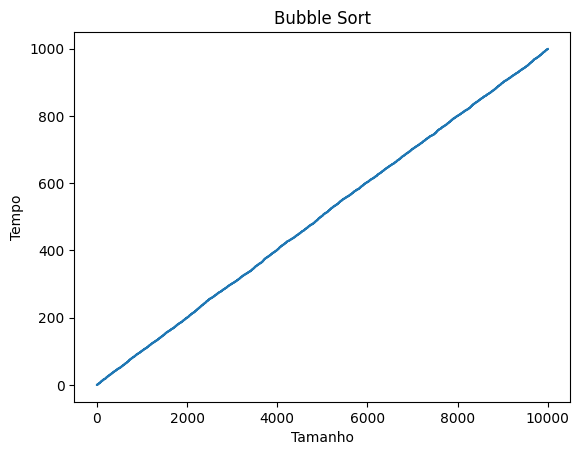

In [35]:
@complexidade_temporal
def bubble_sort(lista):
    for i in range(len(lista)):
        for j in range(0, len(lista)-i-1):
            if lista[j] > lista[j+1]:
                aux = lista[j]
                lista[j] = lista[j + 1]
                lista[j + 1] = aux
                
#Experimente mudar o número do range dentro dos parênteses :)
for tamanho in range(10000):
    tamanho += 1
    
lista = np.random.randint(0, 1000, size=tamanho+1)    

print(bubble_sort(lista))
        
plt.plot(lista)
plt.ylabel("Tempo")
plt.xlabel("Tamanho")
plt.title("Bubble Sort")

#OBS) Pode haver uma diferença desprezível entre o tempo de compilação do bloco de código e o tempo printado 

**COMPLEXIDADE TEMPORAL - Bubble Sort** 
* **Melhor caso:** *O(n)*
* **Caso médio:** *O(n^2)*
* **Pior caso:** *O(n^2)*

##### **INSERTION SORT** => *jogo de cartas*
*  Compara os **2 primeiros** elementos
*  Se o **próximo** for **maior**, ele **troca** de **posição** com o **anterior**
*  Se **não** houverem mais **elementos anteriores** para **comparar**, ele **prossegue**
*  Caso haja uma **troca**, o **menor elemento** é **comparado** com os **anteriores**
*  Mesmo que hajam trocas, as **comparações** com os **elementos anteriores** só **termina** quando **não houverem mais elementos antes**

(None, 4.400382361000084)


Text(0.5, 1.0, 'Insertion Sort')

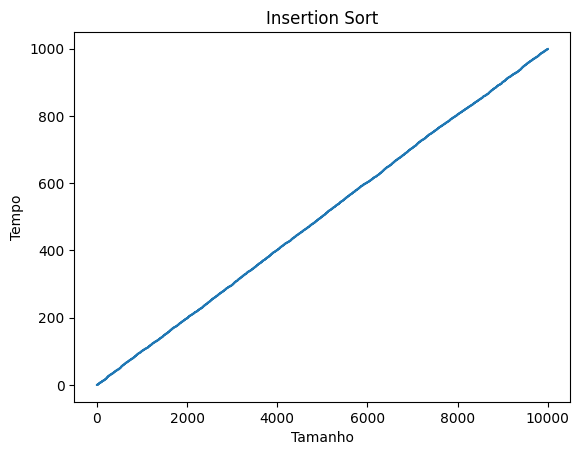

In [39]:
@complexidade_temporal
def insertion_sort(lista):
  for i in range(len(lista)):
      aux = lista[i]
      j = i - 1
      while j >= 0 and lista[j] > aux:
            lista[j + 1] = lista[j]
            j = j - 1
      lista[j + 1] = aux
      
#Experimente mudar o número do range dentro dos parênteses :)
for tamanho in range(10000):
    tamanho += 1
    
lista = np.random.randint(0, 1000, size=tamanho+1)    

print(insertion_sort(lista))

plt.plot(lista)
plt.ylabel("Tempo")
plt.xlabel("Tamanho")
plt.title("Insertion Sort")

#OBS) Pode haver uma diferença desprezível entre o tempo de compilação do bloco de código e o tempo printado 

**COMPLEXIDADE TEMPORAL - Insertion Sort**
* **Melhor caso:** *O(n)*
* **Caso médio:** *O(n^2)*
* **Pior caso:** *O(n^2)*

##### **SELECTION SORT** => *troca nos extremos*
*   O primeiro item é chamado de ***mínimo***
*   O item ***mínimo*** é comparado com o segundo item => se o segundo item for menor, ele deverá ser o novo ***mínimo***
*   A cada iteração, o ***mínimo*** é posto na posição final da lista de números não ordenados
*   Repita esse processo até o item final, atribuindo um novo ***mínimo*** sempre que necessário


(None, 6.014867403999233)


Text(0.5, 1.0, 'Selection Sort')

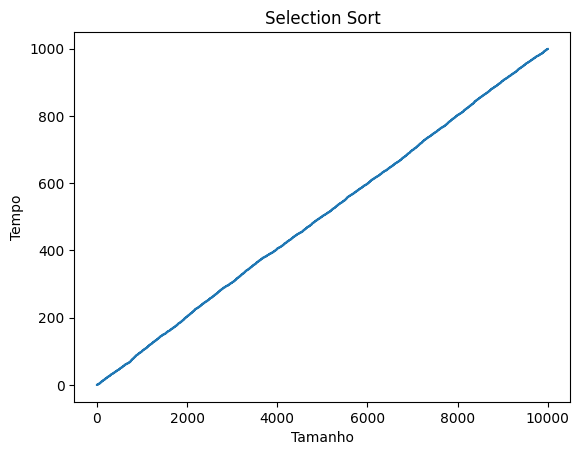

In [40]:
@complexidade_temporal
def selection_sort(lista):
  for i in range(len(lista) - 1):
      minimo = i
      for j in range (i + 1, len(lista)):
          if lista[j] < lista[minimo]:
            minimo = j
      aux = lista[i]
      lista[i] = lista[minimo]
      lista[minimo] = aux
      
#Experimente mudar o número do range dentro dos parênteses :)
for tamanho in range(10000):
    tamanho += 1
    
lista = np.random.randint(0, 1000, size=tamanho+1)    

print(selection_sort(lista))

plt.plot(lista)
plt.ylabel("Tempo")
plt.xlabel("Tamanho")
plt.title("Selection Sort")

#OBS) Pode haver uma diferença desprezível entre o tempo de compilação do bloco de código e o tempo printado 

**COMPLEXIDADE TEMPORAL - Selection Sort**
* **Melhor caso:** *O(n^2)*
* **Caso médio:** *O(n^2)*
* **Pior caso:** *O(n^2)*

##### **QUICK SORT** => *dividir a* ***sequência de números*** *e conquistar a* ***solução***

*   Um elemento da lista é escolhido como **pivô**
*   Os elementos **menores** que o **pivô** ficam à **esquerda** e os elementos **maiores** que o **pivô** ficam à **direita**
*   É comum se referir à essa divisão feita pela escolha do pivô como **partições** -> essas partições se formam a partir de comparações que se dão de maneira recursiva
*   O algoritmo faz constantemente **comparações** entre o **elemento esquerdo com o elemento direito**

**OBSERVAÇÕES**

1.  O quick sort se baseia na técnica de **divisão e conquista** => ele é uma das formas de construir **algoritmos eficientes**
2.  A escolha do pivô pode afetar a **complexidade temporal** do algoritmo, até mesmo em listas pequenas.
3.  A maneira mais segura de escolher um pivô é selecionar o elemento do meio do array
4. O quick sort usa recursão

In [41]:
#CRÉDITOS AO PROFESSOR RONALDO QUE ME AJUDOU A IMPLEMENTAR ESSE MÉTODO <3
@complexidade_temporal
def quick_sort(lista):
    particaoDireita = []
    particaoEsquerda = []
    particaoMeio = []

    if len(lista) <= 1:
       return lista

    pivo = lista[int(len(lista)/2)]

    for i in lista:
        if i < pivo:
           particaoEsquerda.append(i)
        if i > pivo:
           particaoDireita.append(i)
        if i == pivo:
           particaoMeio.append(i)

    return quick_sort(particaoEsquerda) + particaoMeio + quick_sort(particaoDireita)
 
#Experimente mudar o número do range dentro dos parênteses :)
for tamanho in range(100):
    tamanho += 1
    
lista = np.random.randint(0, 1000, size=tamanho+1)    

print(quick_sort(lista))

plt.plot(lista)
plt.ylabel("Tempo")
plt.xlabel("Tamanho")
plt.title("Quick Sort")

#OBS) Pode haver uma diferença desprezível entre o tempo de compilação do bloco de código e o tempo printado 

TypeError: can only concatenate tuple (not "list") to tuple

**COMPLEXIDADE TEMPORAL**

##### **SHELL SORT** => *insertion sort, só que melhor*

* Um número N que corresponde ao número de elementos na lista é sucessivamente dividido por 2 
* A cada loop, N é novamente dividido por 2 conforme a necessidade, se tornando N/2, N/4, N/8 e assim por diante.
* Importante ressaltar que, quando isso ocorre, a distância entre os elementos fica menor.
* Quando ⌊N/2⌋ = 0, a ordenação chega ao fim, pois não existe mais espaço entre os elementos

(array([  1,  31,  34,  41,  79,  95, 117, 121, 126, 146, 164, 204, 205,
       214, 238, 240, 244, 268, 280, 285, 306, 312, 327, 327, 344, 349,
       351, 351, 352, 352, 357, 361, 362, 364, 369, 377, 388, 396, 416,
       419, 427, 428, 441, 459, 462, 462, 470, 474, 475, 496, 502, 510,
       527, 530, 550, 562, 589, 589, 593, 622, 630, 631, 638, 651, 656,
       658, 665, 695, 712, 733, 737, 745, 746, 748, 749, 754, 762, 772,
       797, 806, 810, 819, 821, 824, 826, 844, 844, 849, 869, 902, 904,
       912, 925, 933, 942, 944, 951, 958, 961, 992]), 0.00028032199952576775)


Text(0.5, 1.0, 'Shell Sort')

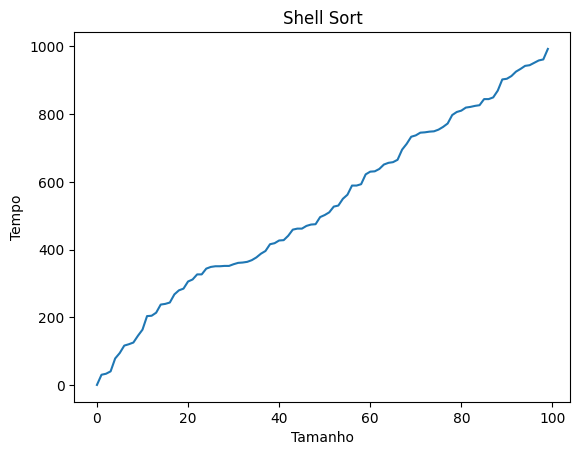

In [42]:
@complexidade_temporal
def shell_sort(lista):
    
    #espaco entre elementos segue sequência N/2, onde N é o tamanho da lista
    
    espaco = len(lista)//2
    
    while espaco > 0: 
        for i in range(espaco, len(lista)): 
            aux = lista[i] 
            j = i 
            while j >= espaco and lista[j - espaco] > aux: 
                lista[j] = lista[j - espaco] 
                j -= espaco 
            lista[j] = aux 
        espaco = espaco // 2 
    return lista

#Experimente mudar o número do range dentro dos parênteses :)
for tamanho in range(10000):
    tamanho += 1

lista = np.random.randint(0, 1000, size=100)

print(shell_sort(lista))

plt.plot(lista)
plt.ylabel("Tempo")
plt.xlabel("Tamanho")
plt.title("Shell Sort")

**OBSERVAÇÕES**
* A sequência original do Shell Sort é dada por $\lfloor N/2^k \rfloor$ 
* Existem outras sequências que podem ser aplicadas no Shell Sort: 
    1. Sequência de Knuth = ***\(3^k - 1\)***
    2. Sequência de Sedgewick = ***\(4^i + 3 $\cdot$ 2^{i-1} + 1 , $para$ i $\geq$ 1 \)***
    3. Sequência de Hibbard = ***\(2^k - 1 , $para$ k $\geq$ 1\)***
    4. Sequência de Papernov e Stasevich = ***\(2^{k + 1} - 3 $para$ k $\cdot$ 1\)***
    5. Sequência de Pratt = ***\(2, 3, 5, 7, 11...\)** :. números primos em ordem crescente*  
* Dependendo do problema, outras sequências podem se mostrar mais eficientes 

**COMPLEXIDADE TEMPORAL**

##### **MERGE SORT** => *dividir, conquistar e* ***combinar***

* Outro método de ordenação que usa **divisão e conquista**
* A lista de elementos é dividida ao **meio** em **sublistas** e assim por diante **até cada elemento ficar isolado**
* Terminadas as divisões, os elementos são **comparados** de **dois em dois** e **ordenados** numa **sublista**
* Os **elementos das sublistas** formadas por esse processo vão sendo **comparados** e **ordenados** até **formar a lista final**, com todos os **elementos originais ordenados**

(array([  0,   0,   0, ..., 116, 607, 607]), 0.046822464999422664)


Text(0.5, 1.0, 'Merge Sort')

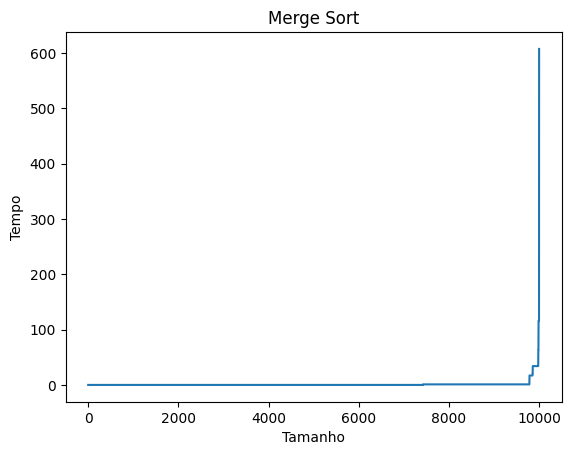

In [43]:
#USAREMOS NOVAMENTE A IDEIA DE PARTIÇÕES DO MÉTODO ANTERIOR
@complexidade_temporal
def merge_sort(lista):

    if len(lista) <= 1:
       return lista

    #operador // realiza uma divisao inteira
    particaoMeio = len(lista)//2
    #elementos antes de particaoMeio - 1
    particaoEsquerda = lista[:particaoMeio]
    #elementos depois de particaoMeio - 1
    particaoDireita = lista[particaoMeio:]

    merge_sort(particaoDireita)
    merge_sort(particaoEsquerda)
    i = j = k = 0

    #combina particaoDireita e particaoEsquerda juntando-as na lista original
    while i < len(particaoEsquerda) and j < len(particaoDireita):
          #condição que compara e ordena os elementos menores
          if particaoEsquerda[i] <= particaoDireita[j]:
             lista[k] = particaoEsquerda[i]
             i += 1
          #condição que compara e ordena os elementos maiores
          else:
             lista[k] = particaoDireita[j]
             j += 1
          k += 1

    #verifica se há elementos restantes em particaoEsquerda
    while i < len(particaoEsquerda):
          lista[k] = particaoEsquerda[i]
          i += 1
          k += 1

    #verifica se há elementos restantes em particaoDireita
    while j < len(particaoDireita):
          lista[k] = particaoDireita[j]
          j += 1
          k += 1

    return lista

#Experimente mudar o número do range dentro dos parênteses :)
for tamanho in range(10000):
    tamanho += 1
    
lista = np.random.randint(0, 1000, size=tamanho+1)    

print(merge_sort(lista))

plt.plot(lista)
plt.ylabel("Tempo")
plt.xlabel("Tamanho")
plt.title("Merge Sort")

**COMPLEXIDADE TEMPORAL**

##### **COUNTING SORT** => *não usa comparações*

* Contaremos o **número de ocorrências** de um certo elemento na lista desordenada numa outra lista com **número de elementos igual ao valor máximo** da lista original, mas todos os elementos serão **zero**, pois ainda não conhecemos as ocorrências
* Em seguida, percorremos a lista original novamente para **reordená-la baseada na lista de ocorrências**.
* Se **houver ocorrência**, o **valor do índice** onde ela ocorreu será **armazenado dentro da lista**.
* Tendo feito isso, **decrementaremos** em **1** o **número de ocorrências** naquele **índice**.

(array([  0,   0,   0, ..., 999, 999, 999]), 0.002179446999434731)


Text(0.5, 1.0, 'Counting Sort')

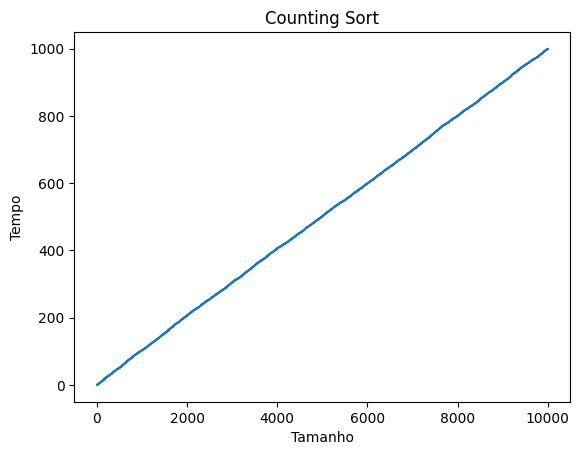

In [45]:
@complexidade_temporal
def counting_sort(lista):
    
    #ocorrencias antes de examinar a lista -> como não temos certeza, é tudo zero 
    contagem_de_ocorrencias = [0] * (max(lista) + 1)
    
    #contagem_de_ocorrencias possui 21 elementos, sendo o último o elemento máximo dentro da lista, pois contamos a partir do 0 
    #o valor do elemento será guardado num índice correspondente ao seu valor da contagem_de_ocorrencias
    
    for i in lista: 
        contagem_de_ocorrencias[i] += 1
        
    #j será o contador que vai reordenar a lista
        
    j = 0 
    
    #se houver ocorrência, ou seja, contagem_de_ocorrencia > 0, o índice de onde ocorreu será armazenado na lista 
    #j é incrementado e seguimos para o próximo elemento dentro da lista original 
    #o índice da contagem_de_ocorrencias é decrementado uma vez que a ocorrência já foi registrada na lista original
    
    for i in range(len(contagem_de_ocorrencias)):
        while contagem_de_ocorrencias[i] > 0:
            lista[j] = i
            j += 1
            contagem_de_ocorrencias[i] -= 1
            
    return lista

for tamanho in range(10000):
    tamanho += 1
    
lista = np.random.randint(0, 1000, size=tamanho+1)    

print(counting_sort(lista))

plt.plot(lista)
plt.ylabel("Tempo")
plt.xlabel("Tamanho")
plt.title("Counting Sort")

**COMPLEXIDADE TEMPORAL**

### **BUCKET SORT**

### **RADIX SORT**

### **COCKTAIL SORT** 

### **COMB SORT**

### **BITONIC SORT**